   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8      6.0  
1      9.5      6.0  
2     10.1      6.0 

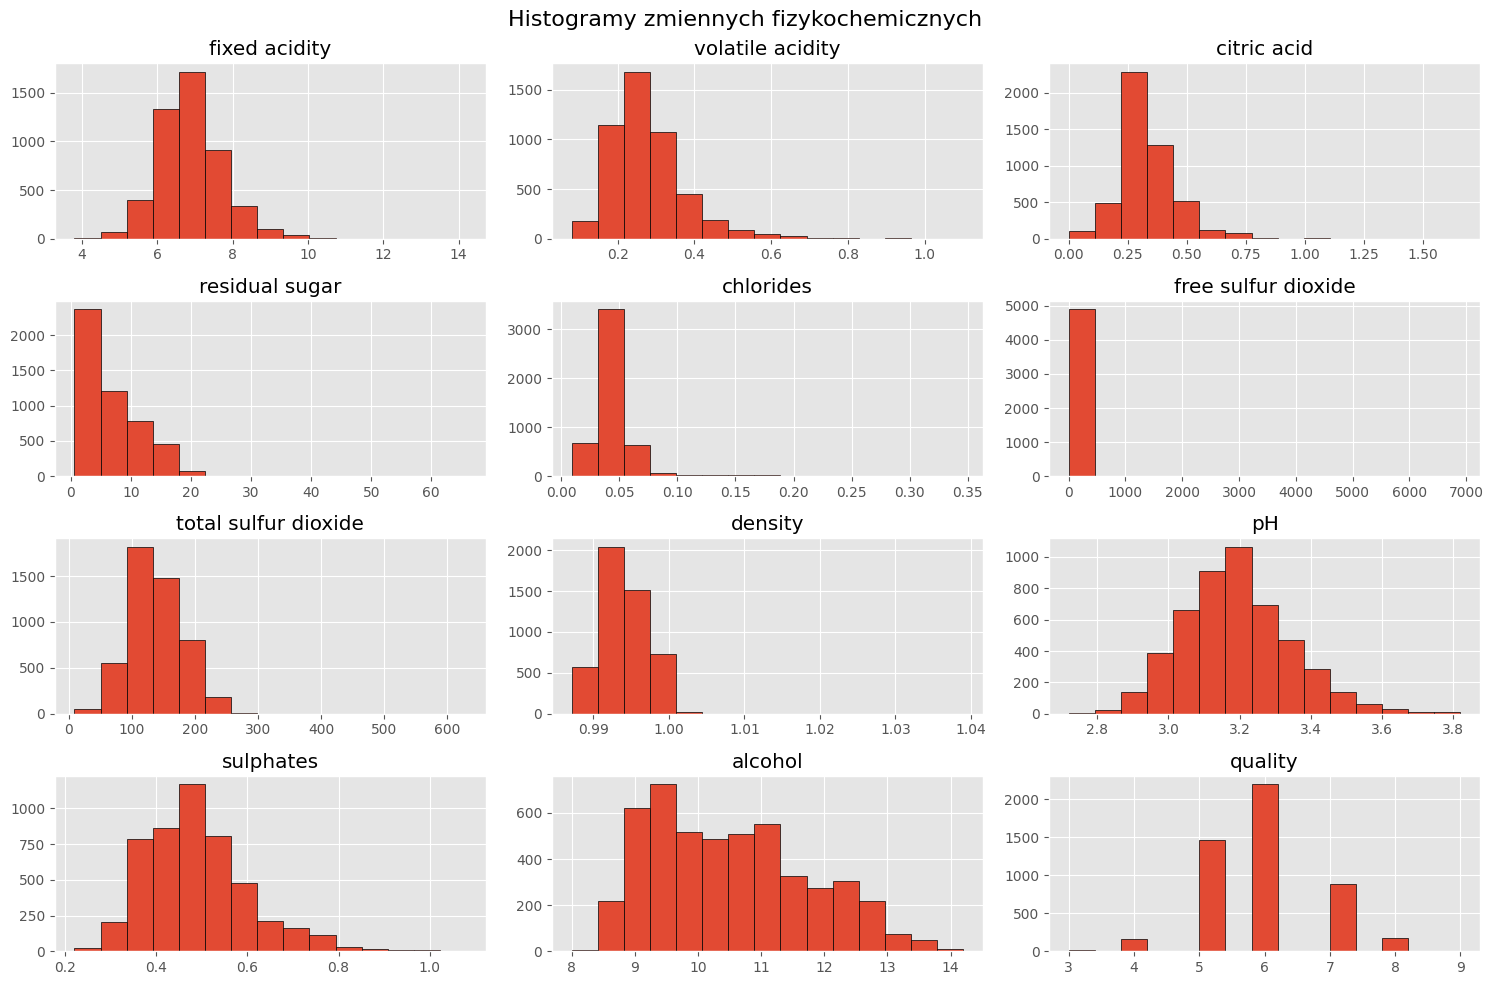

<Figure size 1500x1000 with 0 Axes>

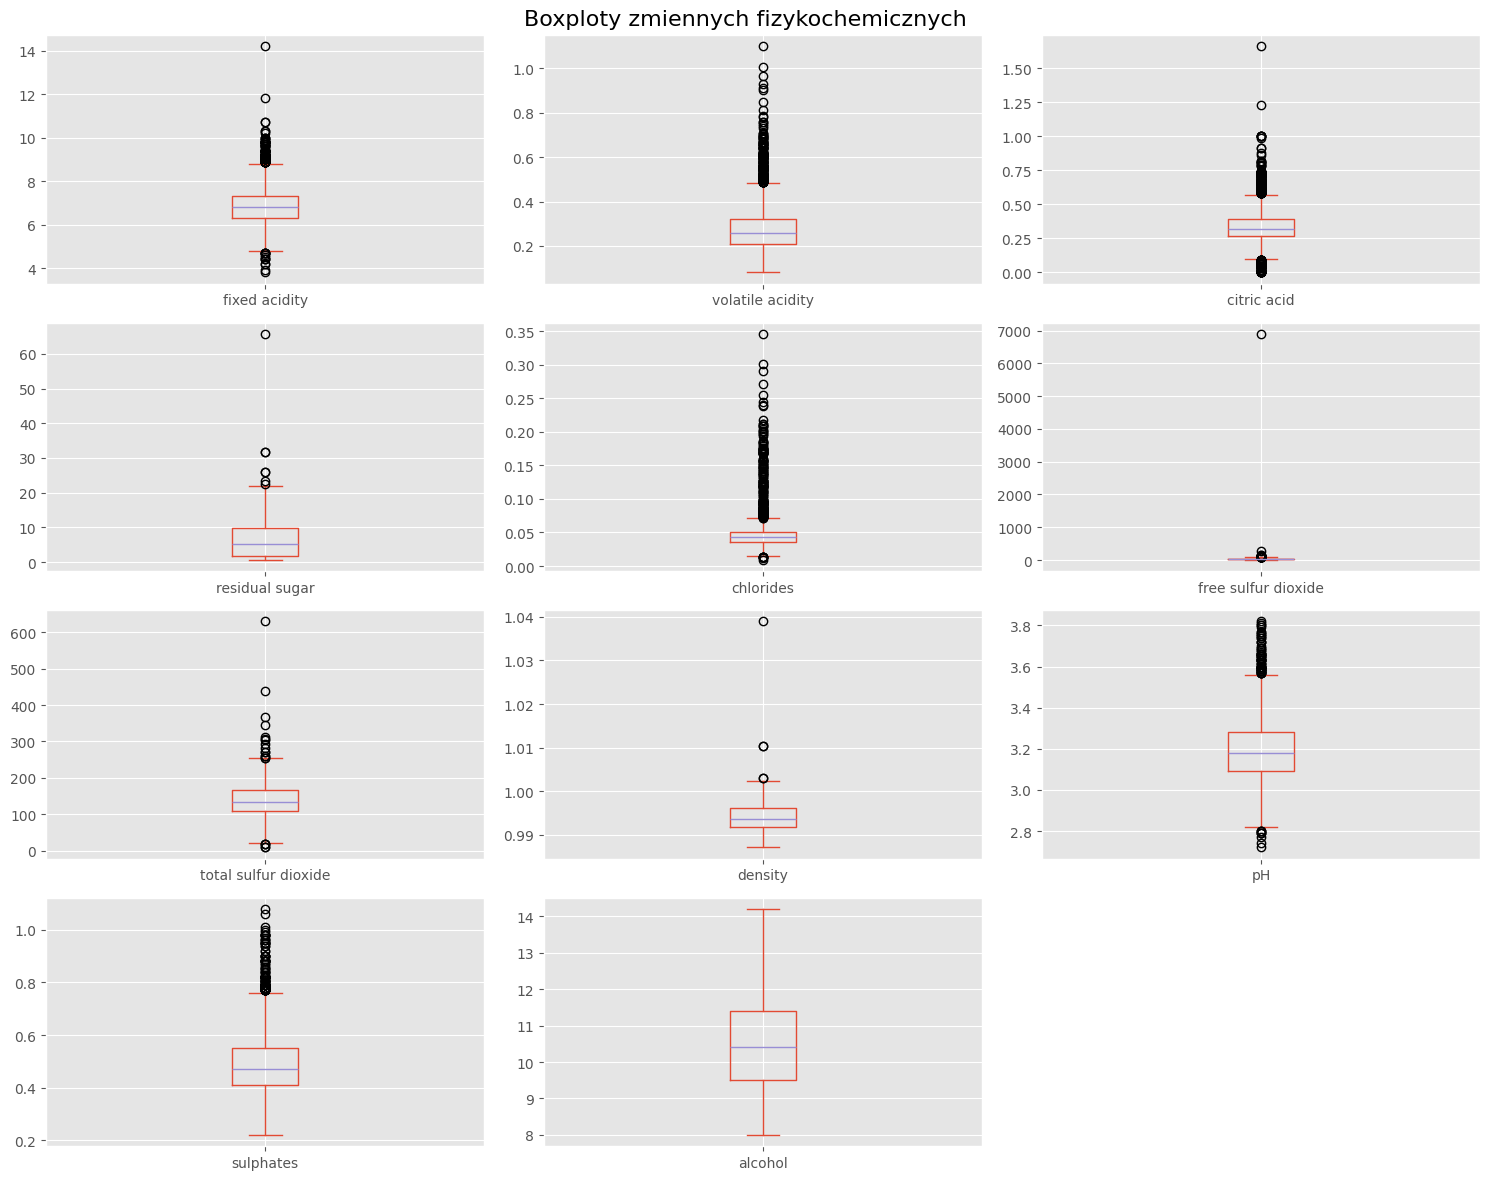

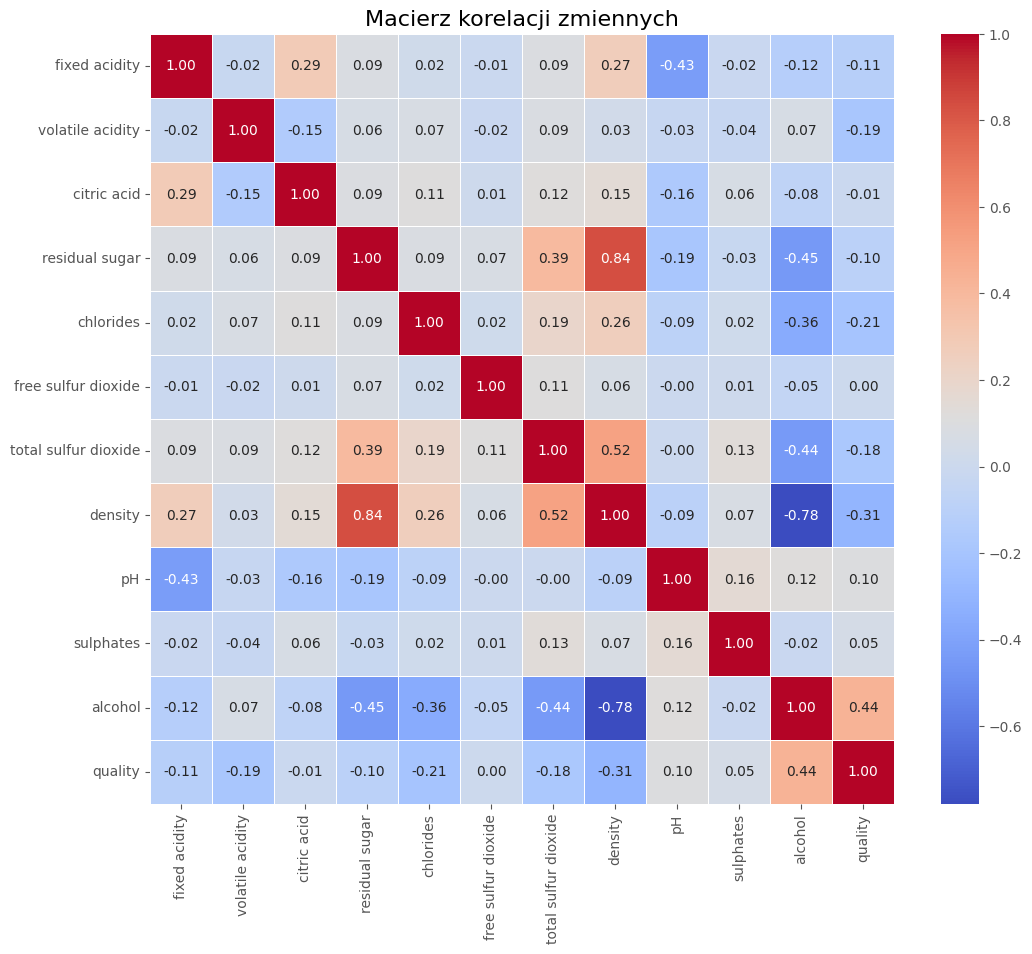

Liczba wierszy po czyszczeniu: 4888
Random Forest accuracy: 0.66


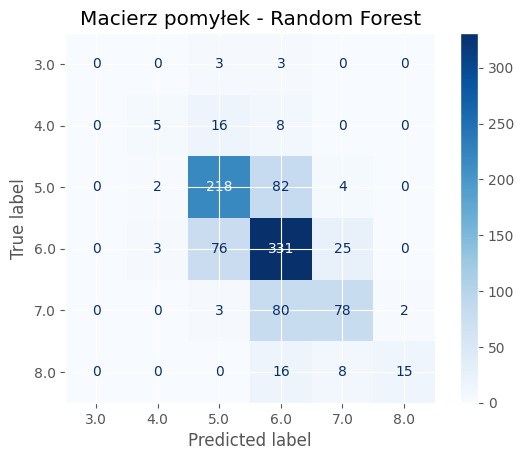

KNN accuracy: 0.55


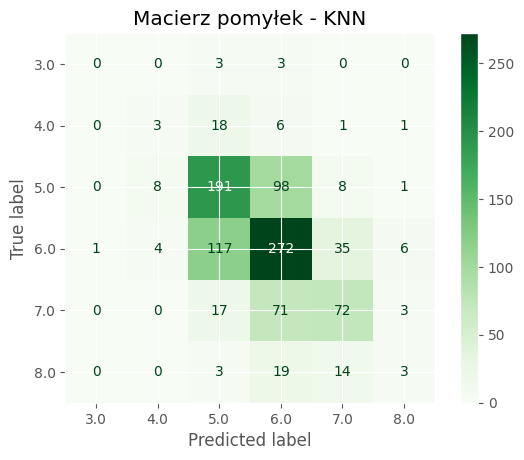

Linear Regression (niezaokrąglone):
MSE: 1.18, MAE: 0.61, R2: -0.49
Accuracy po zaokrągleniu: 0.51
Gradient Boosting Regression:
MSE: 0.49, MAE: 0.55, R2: 0.38
Accuracy po zaokrągleniu: 0.56


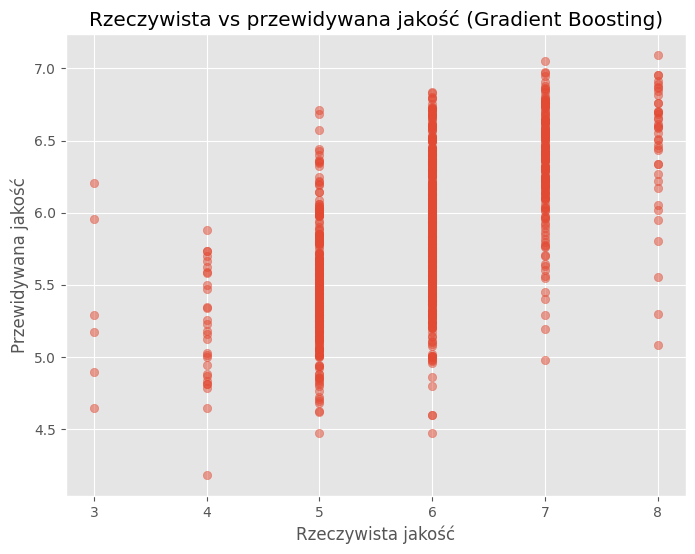

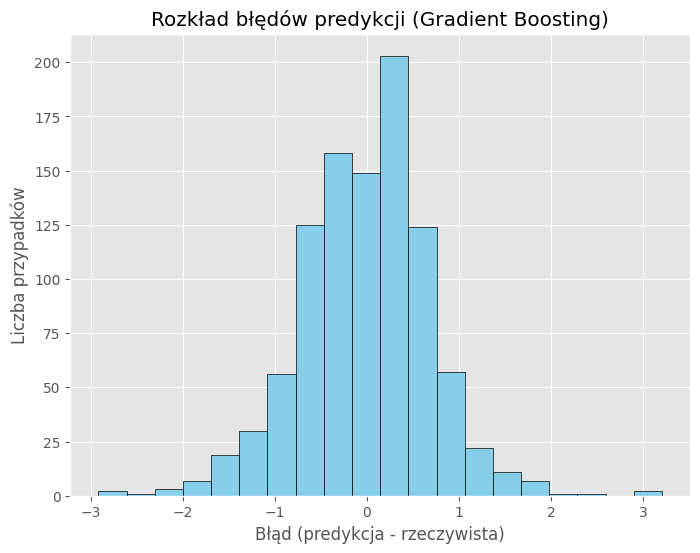

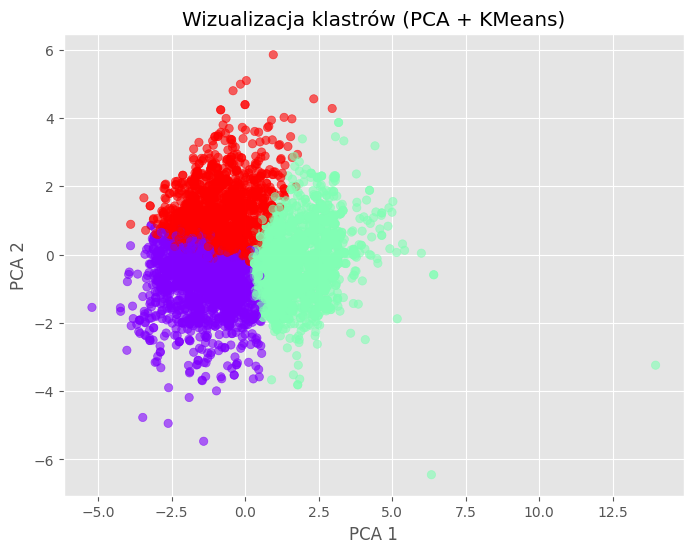

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,6.227153,0.276390,0.286659,3.395510,0.040280,31.646915,122.845449,0.992182,3.306542,0.522291,11.067202,6.114844
1,6.970909,0.285590,0.363091,11.093967,0.055613,48.223691,170.646556,0.997034,3.153862,0.495129,9.476253,5.582920
2,7.428273,0.270585,0.351957,3.874617,0.039474,27.857939,115.590529,0.992334,3.096650,0.446497,11.194896,5.977716


In [4]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



df = pd.read_csv('winequality-white.csv', sep=';')



print(df.head())

print(df.info())

print(df.describe())

df.isnull().sum()



plt.style.use('ggplot')



df.hist(bins=15, figsize=(15, 10), edgecolor='black')

plt.suptitle('Histogramy zmiennych fizykochemicznych', fontsize=16)

plt.tight_layout()

plt.show()



plt.figure(figsize=(15, 10))



df.drop(columns='quality').plot(kind='box', subplots=True, layout=(4,3), figsize=(15,12), sharex=False, sharey=False)

plt.suptitle('Boxploty zmiennych fizykochemicznych', fontsize=16)

plt.tight_layout()

plt.show()



corr = df.corr()



plt.figure(figsize=(12,10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title('Macierz korelacji zmiennych', fontsize=16)

plt.show()



df_clean = df.dropna()

print(f"Liczba wierszy po czyszczeniu: {df_clean.shape[0]}")



from sklearn.preprocessing import StandardScaler



X = df_clean.drop("quality", axis=1)

y = df_clean["quality"]



scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)



y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest accuracy: {acc_rf:.2f}")



import numpy as np

cm_rf = confusion_matrix(y_test, y_pred_rf)

labels = np.unique(np.concatenate((y_test, y_pred_rf)))

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=labels)

disp_rf.plot(cmap='Blues')

plt.title("Macierz pomyłek - Random Forest")

plt.show()



from sklearn.neighbors import KNeighborsClassifier





knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)



y_pred_knn = knn_model.predict(X_test)



acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"KNN accuracy: {acc_knn:.2f}")



cm_knn = confusion_matrix(y_test, y_pred_knn)

labels_knn = np.unique(np.concatenate((y_test, y_pred_knn)))

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=labels_knn)

disp_knn.plot(cmap='Greens')

plt.title("Macierz pomyłek - KNN")

plt.show()



from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



lr_model = LinearRegression()

lr_model.fit(X_train, y_train)



y_pred_lr = lr_model.predict(X_test)



y_pred_lr_rounded = y_pred_lr.round()



mse = mean_squared_error(y_test, y_pred_lr)

mae = mean_absolute_error(y_test, y_pred_lr)

r2 = r2_score(y_test, y_pred_lr)



accuracy_rounded = accuracy_score(y_test, y_pred_lr_rounded)



print(f"Linear Regression (niezaokrąglone):")

print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

print(f"Accuracy po zaokrągleniu: {accuracy_rounded:.2f}")



from sklearn.ensemble import GradientBoostingRegressor



gbr_model = GradientBoostingRegressor(random_state=42)

gbr_model.fit(X_train, y_train)



y_pred_gbr = gbr_model.predict(X_test)

y_pred_gbr_rounded = y_pred_gbr.round()



mse_gbr = mean_squared_error(y_test, y_pred_gbr)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

r2_gbr = r2_score(y_test, y_pred_gbr)

acc_gbr = accuracy_score(y_test, y_pred_gbr_rounded)



print(f"Gradient Boosting Regression:")

print(f"MSE: {mse_gbr:.2f}, MAE: {mae_gbr:.2f}, R2: {r2_gbr:.2f}")

print(f"Accuracy po zaokrągleniu: {acc_gbr:.2f}")



plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_gbr, alpha=0.5)

plt.xlabel("Rzeczywista jakość")

plt.ylabel("Przewidywana jakość")

plt.title("Rzeczywista vs przewidywana jakość (Gradient Boosting)")

plt.grid(True)

plt.show()



errors = y_pred_gbr - y_test



plt.figure(figsize=(8,6))

plt.hist(errors, bins=20, edgecolor='black', color='skyblue')

plt.title("Rozkład błędów predykcji (Gradient Boosting)")

plt.xlabel("Błąd (predykcja - rzeczywista)")

plt.ylabel("Liczba przypadków")

plt.grid(True)

plt.show()



from sklearn.cluster import KMeans

from sklearn.decomposition import PCA



kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(X_scaled)



df_clustered = df_clean.copy()

df_clustered['Cluster'] = clusters



pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)



plt.figure(figsize=(8,6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', alpha=0.6)

plt.title("Wizualizacja klastrów (PCA + KMeans)")

plt.xlabel("PCA 1")

plt.ylabel("PCA 2")

plt.grid(True)

plt.show()



group_profiles = df_clustered.groupby('Cluster').mean(numeric_only=True)

display(group_profiles)





